Poleg "standardnih" Python paketov za delovanje potrebujete tudi:

* [PyDaQMx](https://pypi.org/project/PyDAQmx/)
* [pyExSi](https://pypi.org/project/pyExSi/)


---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
%matplotlib inline

# Nastavitev meritve

In [6]:
output_task = 'generiranje_signala'

# Nastavitev generiranega signala vzbujanja

Parametre preberemo iz pripravljenega "task"-a:

In [7]:
o_task = DAQTask(output_task)
fs_output = int(o_task.sample_rate)
N_samples_output = int(o_task.samples_per_ch)
o_task.clear_task(wait_until_done=False)

In [8]:
print(fs_output, N_samples_output)

20000 100000


V primeru napake `DuplicateTaskError`pred odpiranjem novega taska zaprite obstoječega z:

In [9]:
o_task.clear_task(wait_until_done=False)

## Priprava naključnega signala za generiranje

Uporabimo paket [pyExSi](https://pypi.org/project/pyExSi/):

In [10]:
import pyExSi as es

Definicija profila vzbujanja - enostranske PSD generiranega signala:

In [11]:
t_out = np.arange(0, N_samples_output) / fs_output

# IO funkcija

In [16]:
def random(time=t_out, f0=5, f1=1000):

    freq = np.fft.rfftfreq(N_samples_output, 1/fs_output)

    freq_lower = f0 # spodnja frekvenčna meja PSD [Hz]
    freq_upper = f1 # zgornja frekvenčna meja PSD [Hz]

    PSD = es.get_psd(freq, freq_lower, freq_upper) # one-sided flat-shaped PSD

    output_signal = es.random_gaussian(N_samples_output, PSD, fs_output) 
    output_signal = output_signal / np.max(np.abs(output_signal)) * 0.9 # normiranje max. amplitude > 0.9 V

    trigger_signal = np.zeros_like(output_signal)
    trigger_signal[:int(fs_output*0.5)] = 3.
    
    output_data = np.vstack([output_signal, trigger_signal])
    
    o_task = DAQTask(output_task)
    try:
        o_task.generate(output_data, clear_task=False) # generiranje signala

        # Konec meritve
        o_task.clear_task(wait_until_done=True)

        # Generiranje praznega signala
        o_task_clear = DAQTask(output_task)
        o_task_clear.generate(1e-10*np.ones_like(output_data), clear_task=False)
        o_task_clear.clear_task(wait_until_done=False)
    
    # Prikaz napake, če se merilna zanka predčasno ustavi
    except Exception as e:
        print(f'NAPAKA:\n\t{e}\n')
        o_task.clear_task(wait_until_done=False)
        return None

In [12]:
def prelet(time=t_out, f0=5, f1=1000, mode='logarithmic'):
    output_signal = es.sine_sweep(time=time, freq_start=f0, freq_stop=f1, mode=mode)
    output_signal = output_signal / np.max(np.abs(output_signal)) * 0.9 # normiranje max. amplitude > 0.9 V

    trigger_signal = np.zeros_like(output_signal)
    trigger_signal[:int(fs_output*0.5)] = 3.
    
    output_data = np.vstack([output_signal, trigger_signal])
    
    o_task = DAQTask(output_task)
    try:
        o_task.generate(output_data, clear_task=False) # generiranje signala

        # Konec meritve
        o_task.clear_task(wait_until_done=True)

        # Generiranje praznega signala
        o_task_clear = DAQTask(output_task)
        o_task_clear.generate(1e-10*np.ones_like(output_data), clear_task=False)
        o_task_clear.clear_task(wait_until_done=False)
    
    # Prikaz napake, če se merilna zanka predčasno ustavi
    except Exception as e:
        print(f'NAPAKA:\n\t{e}\n')
        o_task.clear_task(wait_until_done=False)
        return None

In [13]:
def sine(time=t_out, f=100):
    output_signal = np.sin(2*np.pi*time * f)
    output_signal = output_signal / np.max(np.abs(output_signal)) * 0.9 # normiranje max. amplitude > 0.9 V

    trigger_signal = np.zeros_like(output_signal)
    trigger_signal[:int(fs_output*0.5)] = 3.

    output_data = np.vstack([output_signal, trigger_signal])

    o_task = DAQTask(output_task)
    try:
        o_task.generate(output_data, clear_task=False) # generirranje signala

        # Konec meritve
        o_task.clear_task(wait_until_done=True)

        # Generiranje praznega signala
        o_task_clear = DAQTask(output_task)
        o_task_clear.generate(1e-10*np.ones_like(output_data), clear_task=False)
        o_task_clear.clear_task(wait_until_done=False)
    
    # Prikaz napake, če se merilna zanka predčasno ustavi
    except Exception as e:
        print(f'NAPAKA:\n\t{e}\n')
        o_task.clear_task(wait_until_done=False)
        return None

# Meritev

In [17]:
random(t_out, 10, 1000)

0.8999999991119885 3.0 <class 'numpy.ndarray'> float64 (2, 100000)


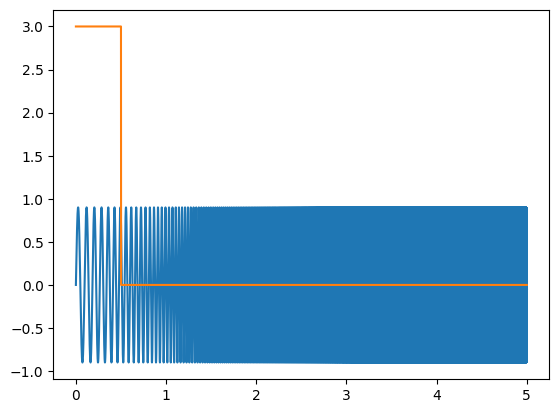

In [22]:
prelet(t_out, 10, 1000)

In [40]:
sine(t_out, 1)